In [146]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [147]:
df = pd.read_csv("D:\\ITI\\Data Visualization\\labs\\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [148]:
df[df.release_year.isin([2020])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
17,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,"September 17, 2021",2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...
...,...,...,...,...,...,...,...,...,...,...,...,...
5972,s5973,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
7594,s7595,Movie,Norm of the North: Family Vacation,Anthony Bell,"Andrew Toth, Lisa Durupt, Jonathan Holmes, Pau...",United States,"May 25, 2020",2020,TV-Y7,89 min,Children & Family Movies,"Stressed by his duties as king and father, Nor..."
8099,s8100,Movie,Straight Up,James Sweeney,"James Sweeney, Katie Findlay, Randall Park, Hi...",United States,"June 26, 2020",2020,TV-MA,96 min,"Comedies, Independent Movies, LGBTQ Movies",When a gay brainiac with OCD questions his ide...
8125,s8126,TV Show,Super Wings,NaN,"Luca Padovan, Evan Smolin, Junah Jang, Colin C...","United States, South Korea, China","December 1, 2020",2020,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows",A cheerful jet and his transforming pals striv...


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [150]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [168]:
df['release_year'].min()

numpy.int64

In [152]:
df = df.fillna("Unknown")
netflix_shows = df[df['type'] == "TV Show"] 
netflix_movie = df[df['type'] == "Movie"] 

In [153]:
px.histogram(df, x= "type", color = "type", template = 'plotly_dark')

In [155]:
def show_graph(df):
    plt.figure(figsize=(8,7), dpi = 200)
    plt.pcolor(df, cmap='afmhot_r')
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize = 7)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize = 7)
    plt.title("Netflix content update ", fontsize = 12)

    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=8) 
    cbar.ax.minorticks_on()
    plt.show()


def analyze_months_and_shows(data):
    netflix_date = data[['date_added']].dropna() 
    netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split()[-1])
    netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.split()[0]) 
    month_order=['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December'][::-1]
    df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
    show_graph(df)
    # fig = px.imshow(df, text_auto=True)
    # fig.show()

    return df

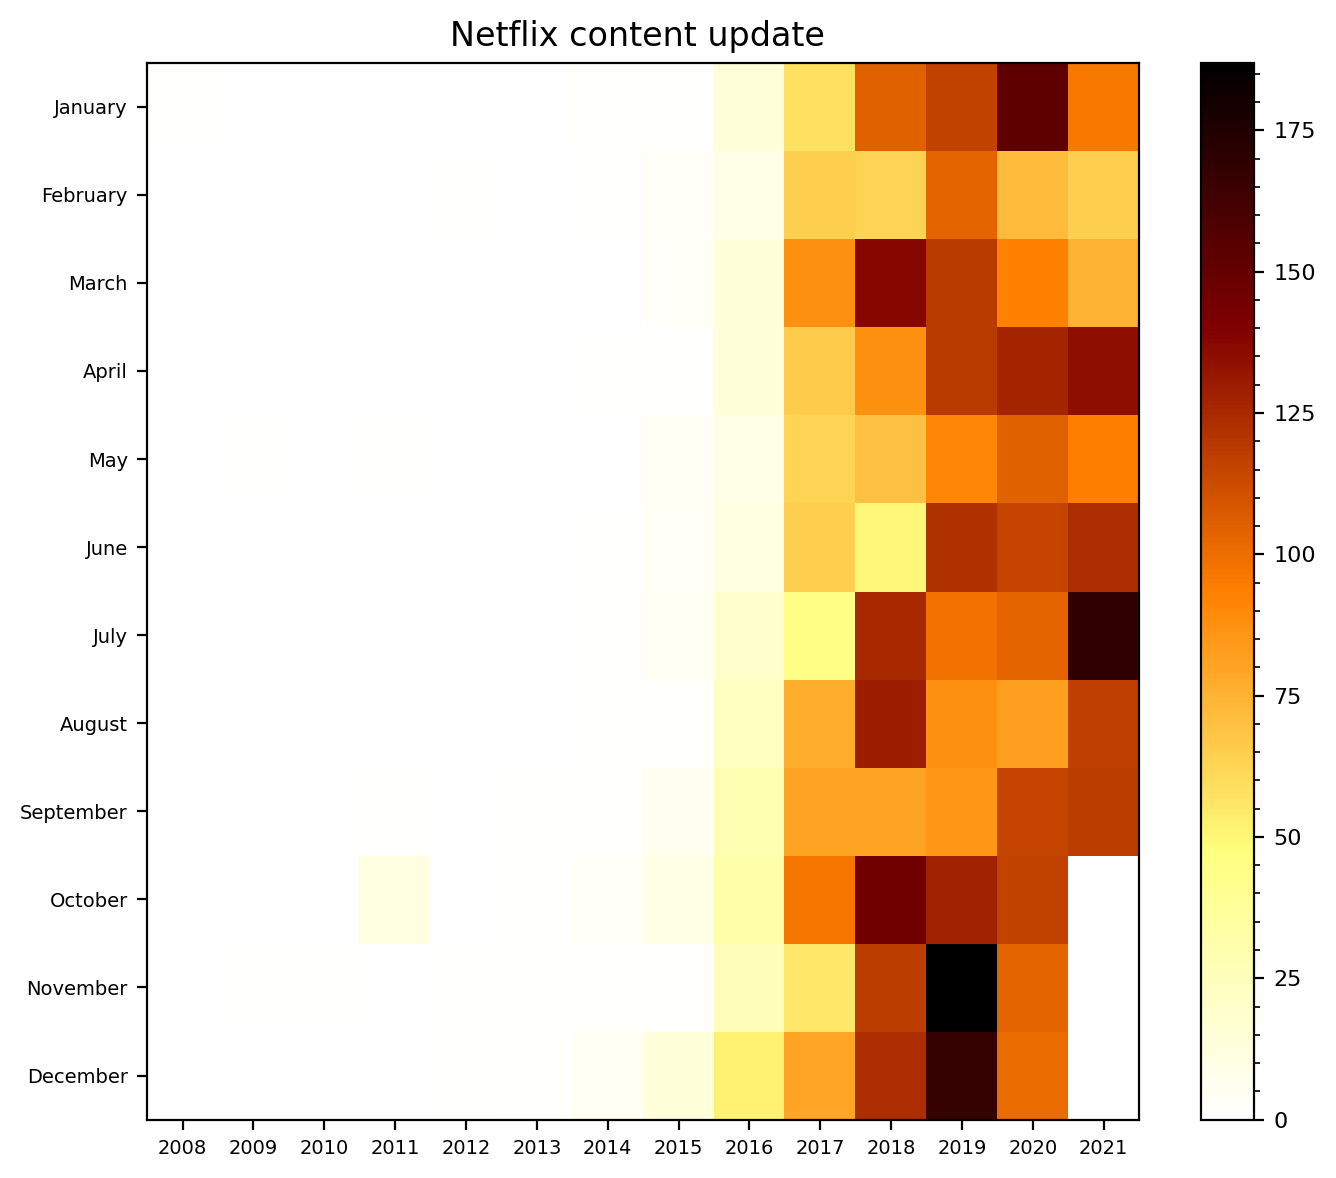

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,5.0,14.0,52.0,80.0,124.0,168.0,101.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,26.0,55.0,118.0,187.0,103.0,0.0
October,0.0,0.0,0.0,11.0,0.0,1.0,4.0,10.0,32.0,97.0,146.0,128.0,116.0,0.0
September,0.0,0.0,0.0,1.0,0.0,1.0,1.0,6.0,29.0,81.0,81.0,86.0,115.0,118.0
August,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,23.0,77.0,130.0,87.0,82.0,117.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,19.0,45.0,125.0,98.0,103.0,169.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,11.0,65.0,50.0,122.0,115.0,124.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,9.0,63.0,70.0,91.0,105.0,94.0
April,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,14.0,66.0,87.0,119.0,127.0,135.0


In [156]:
analyze_months_and_shows(netflix_movie)

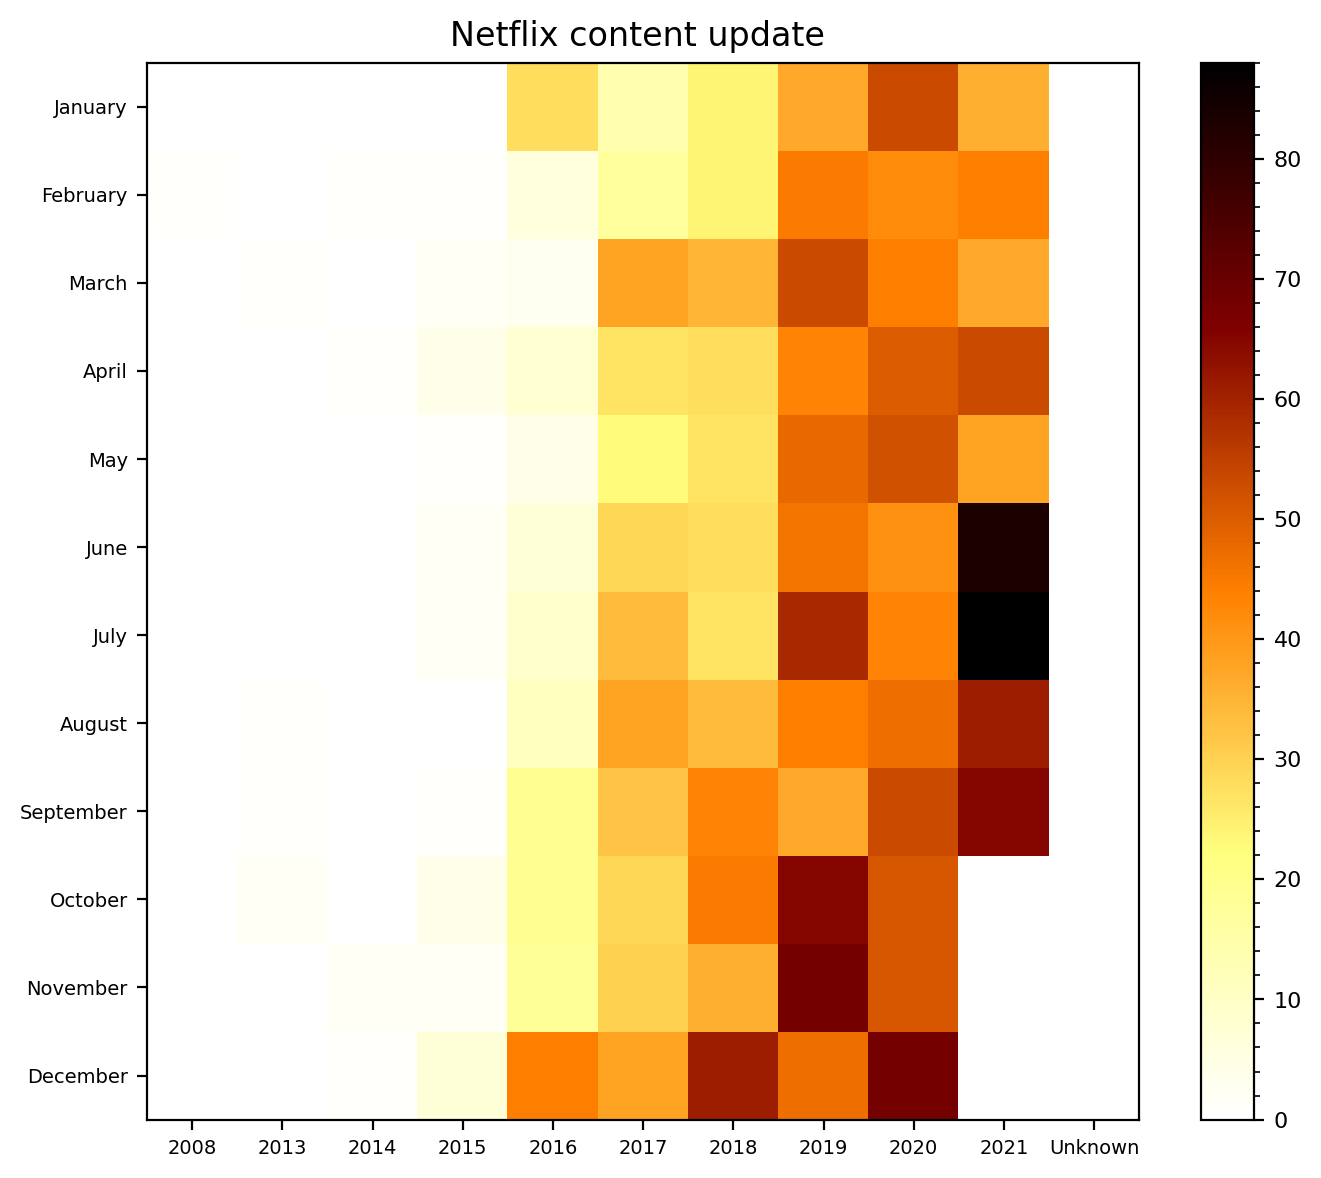

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unknown
month,,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0,0.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0,0.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0,0.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0,0.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0,0.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0,0.0


In [157]:
analyze_months_and_shows(netflix_shows)

In [158]:
# df['rating'].value_counts().index[0:len(df['rating'].unique())].to_list()[:10]

df_ratings = df[df.rating.isin(df['rating'].value_counts().index[0:len(df['rating'].unique())].to_list()[:10])]
df_ratings

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [159]:
def rating(df, title):
    plt.figure(figsize=(12,10))
    df_ratings = df[df.rating.isin(df['rating'].value_counts().index[0:len(df['rating'].unique())].to_list()[:10])]
    fig = px.histogram(df_ratings, x = 'rating', category_orders = {'rating': df_ratings['rating'].value_counts().index[0:len(df_ratings['rating'].unique())].to_list()[:10]}, 
              template = 'plotly_dark', title = title, color = 'rating')
    return fig

In [160]:
rating(netflix_movie, 'Movie Ratings')

<Figure size 864x720 with 0 Axes>

In [161]:
rating(netflix_shows, "Show ratings")

<Figure size 864x720 with 0 Axes>

In [162]:
def release_year_yearly(df, title):
    plt.figure(figsize=(12,10))
    ax=sns.countplot(y='release_year', data=df, order=df['release_year'].value_counts().index[0:18])
    plt.xlabel("Number of releases")
    plt.ylabel('Release Year')
    plt.title(title)

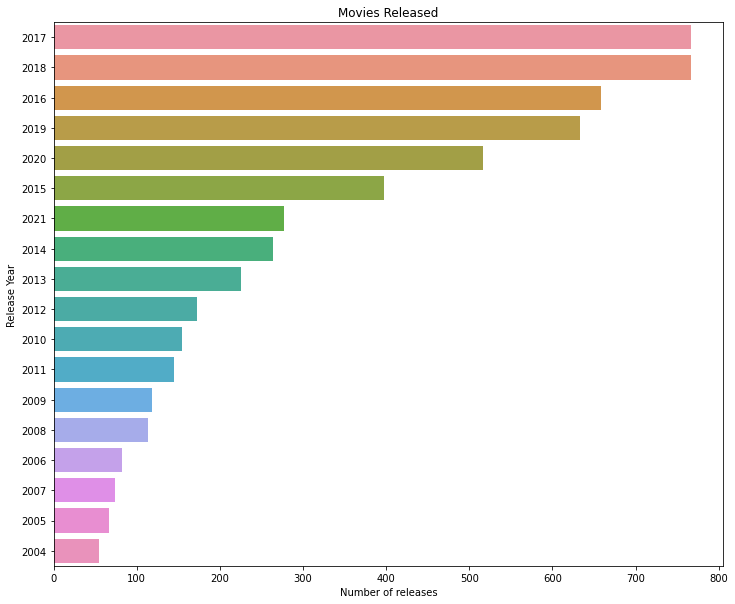

In [163]:
release_year_yearly(netflix_movie, "Movies Released")

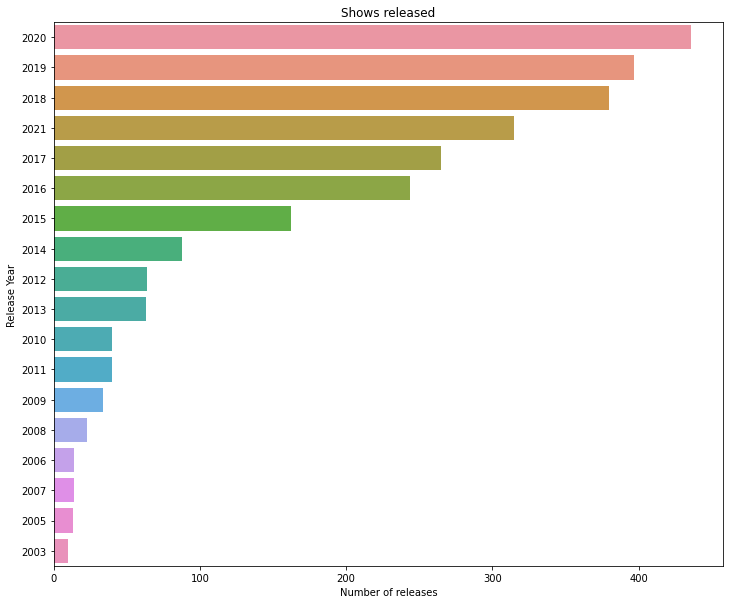

In [164]:
release_year_yearly(netflix_shows, "Shows released")

In [165]:
def country_analysis(df, Title, graph=True):
    countries={}
    country = list(df['country'].fillna('Unknown'))
    for i in country:
        i=list(i.split(','))
        if len(i)==1:
            if i in list(countries.keys()):
                print(i)
                countries[i]+=1
            else:
                countries[i[0]]=1
        else:
            for j in i:
                if j in list(countries.keys()):
                    countries[j]+=1
                else:
                    countries[j]=1
    final_countries={}

    for country, no in countries.items():
        country=country.replace(' ', '')
        if country in list(final_countries.keys()):
            final_countries[country]+=no
        else:
            final_countries[country]=no

    final_countries={k:v for k, v in sorted(final_countries.items(), key=lambda item : item[1] , reverse=True)}
    dict_to_pandaframe = {'Country': list(final_countries.keys()), Title: list(final_countries.values())}
    countries_df = pd.DataFrame(dict_to_pandaframe)
    print(countries_df)

    if graph==True:
        # plt.figure(figsize=(12,10))
        # ax=sns.barplot(x=list(final_countries.keys())[0:10], y=list(final_countries.values())[0:10])
        fig = px.bar(countries_df.head(10), x='Country', y = Title, template = 'plotly_dark', title = Title, color = 'Country')
    
    return fig

In [166]:
country_analysis(netflix_movie, "Movies Produced")

           Country  Movies Produced
0     UnitedStates              389
1           France              158
2    UnitedKingdom              153
3           Canada              134
4          Germany              107
..             ...              ...
114          Sudan                1
115         Panama                1
116         Uganda                1
117    EastGermany                1
118     Montenegro                1

[119 rows x 2 columns]


In [167]:
country_analysis(netflix_shows, "Shows Produced")

          Country  Shows Produced
0    UnitedStates              93
1          Canada              43
2   UnitedKingdom              27
3           Japan              27
4          France              27
..            ...             ...
62           Cuba               1
63       Pakistan               1
64     Azerbaijan               1
65        Ukraine               1
66    Switzerland               1

[67 rows x 2 columns]


In [1]:
from dash import Dash
from dash import dcc
from dash import html
from dash.dependencies import Input
from dash.dependencies import Output
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd

def country_analysis(df, Title, graph=True):
    countries={}
    country = list(df['country'].fillna('Unknown'))
    for i in country:
        i=list(i.split(','))
        if len(i)==1:
            if i in list(countries.keys()):
                print(i)
                countries[i]+=1
            else:
                countries[i[0]]=1
        else:
            for j in i:
                if j in list(countries.keys()):
                    countries[j]+=1
                else:
                    countries[j]=1
    final_countries={}

    for country, no in countries.items():
        country=country.replace(' ', '')
        if country in list(final_countries.keys()):
            final_countries[country]+=no
        else:
            final_countries[country]=no

    final_countries={k:v for k, v in sorted(final_countries.items(), key=lambda item : item[1] , reverse=True)}
    dict_to_pandaframe = {'Country': list(final_countries.keys()), Title: list(final_countries.values())}
    countries_df = pd.DataFrame(dict_to_pandaframe)

    if graph==True:
        fig = px.bar(countries_df.head(), x='Country', y = Title, template = 'plotly_dark', title = Title, color = 'Country')
    
    return fig

def rating(df:pd.DataFrame, title:str):
    df = df.fillna("Unknown")
    df_ratings = df[df.rating.isin(df['rating'].value_counts().index[0:len(df['rating'].unique())].to_list()[:5])]
    fig = px.histogram(df_ratings, x = 'rating', category_orders = {'rating': df_ratings['rating'].value_counts().index[0:len(df_ratings['rating'].unique())].to_list()}, 
              template = 'plotly_dark', title = title, color = 'rating')
    return fig



#Starting the Application
def main() -> None:
    df = pd.read_csv("D:\\ITI\\Data Visualization\\labs\\netflix_titles.csv")
    app = Dash(external_stylesheets = [dbc.themes.CYBORG])

    
    app.layout = html.Div([ 

        dbc.Row([
            dbc.Col(html.H3("Netflix Statistics"), width = {'size': 8, 'offset': 6})
        ], justify="center", align="center"), 

        # dbc.Row([
        #     dbc.Col([
        #                 html.Div(
        #                     [
        #                         html.Div(
        #                             [
        #                                 html.P("No. of Wells"),
        #                                 html.H6(
        #                                     id="well_text",
        #                                     className="info_text"
        #                                 )
        #                             ],
        #                             id="wells",
        #                             className="pretty_container")
        #                     ], className = "mini_container")
        #             ])
        # ]),

        dbc.Row([
            dbc.Col(dcc.Graph(id = "myGraph1", figure = {}), width = {'size': 8, 'offset': 2, 'order':0}, style={'color': 'red', 'fontSize': 40, 'textAlign': 'center'}),
            ], align = "center"),
            
        

        dbc.Row([
            dbc.Col(dcc.Graph(id = "myGraph2", figure = {}), width = {'size': 4, 'offset': 0, 'order':1}),
            dbc.Col(dcc.Dropdown(options = [{'label': str(release_year), 'value': release_year} for release_year in df['release_year'].sort_values(ascending = False).unique()], 
                        value = None, 
                        id = 'demoDropdown',
                        placeholder = 'Choose a year...',
                        multi = True), width = {'size': 4, 'offset':0, 'order':2}, align = "center"),
            dbc.Col(dcc.Graph(id = "myGraph3", figure = {}), width = {'size': 4, 'offset': 0, 'order':3})
        ]),

        dbc.Row([
            dbc.Col(dcc.Graph(id = "myGraph4", figure = {}), width = {'size': 6, 'offset': 0, 'order':1}),
            dbc.Col(dcc.Graph(id = "myGraph5", figure = {}), width = {'size': 6, 'offset': 0, 'order':2})
            ]),
        ])

    @app.callback(
        Output('myGraph1', 'figure'),
        Output('myGraph2', 'figure'),
        Output('myGraph3', 'figure'),
        Output('myGraph4', 'figure'),
        Output('myGraph5', 'figure'),
        Input('demoDropdown', 'value'),
    )
    def update_output(demoDropdown):

        if demoDropdown == None:
            filtered_df = df.copy()
        elif len(demoDropdown) == 0:
            filtered_df = df.copy()
        else:
            filtered_df = df[df.release_year.isin(demoDropdown)]
            

        netflix_shows = filtered_df[filtered_df['type'] == "TV Show"] 
        netflix_movie = filtered_df[filtered_df['type'] == "Movie"] 
        fig1 = px.histogram(filtered_df, 
                            x= "type", 
                            color = "type", 
                            template = 
                            'plotly_dark',
                            )

        fig2 = rating(netflix_movie, 'Movie Ratings')
        fig3 = rating(netflix_shows, "Show ratings")
        fig4 = country_analysis(netflix_movie, "Movies Produced")
        fig5 = country_analysis(netflix_shows, "Shows Produced")
        
        return fig1, fig2, fig3, fig4, fig5

    app.run_server()

if __name__ == '__main__':
    main()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Apr/2022 14:51:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:51:55] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:51:55] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:51:55] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [28/Apr/2022 14:51:55] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [28/Apr/2022 14:51:55] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [28/Apr/2022 14:51:56] "POST /_dash-update-component HTTP/1.1" 200 -
